# LGM - Beginner Level - Task 1

# Rashmi S

# Iris Flowers Classification ML Project

### Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/Internships/LGM internship/beginer-iris/iris.data", sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

Equally distributed

# Preprocessing the dataset

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# EDA

In [8]:
a=df.columns
a

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [9]:
b=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

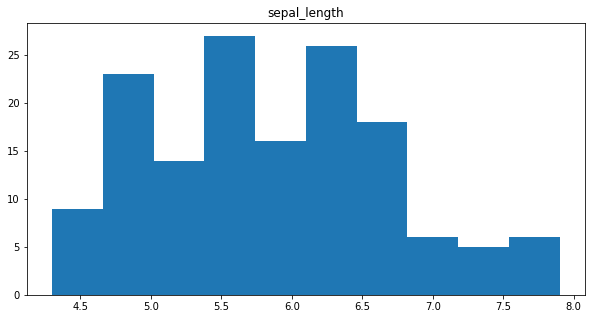

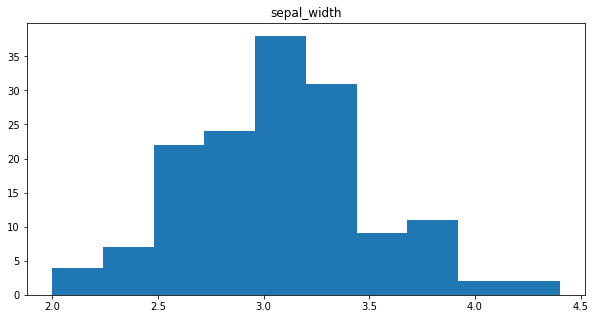

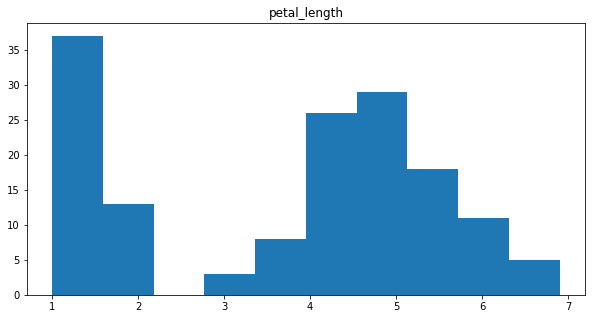

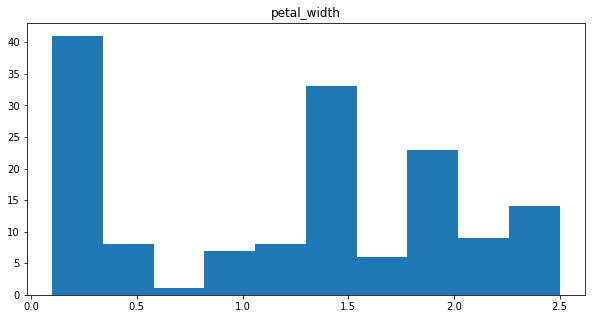

In [10]:
for i in b:
    
    fig, ax = plt.subplots(figsize =(10, 5))
    plt.title(i)
    ax.hist(df[i])

<AxesSubplot:>

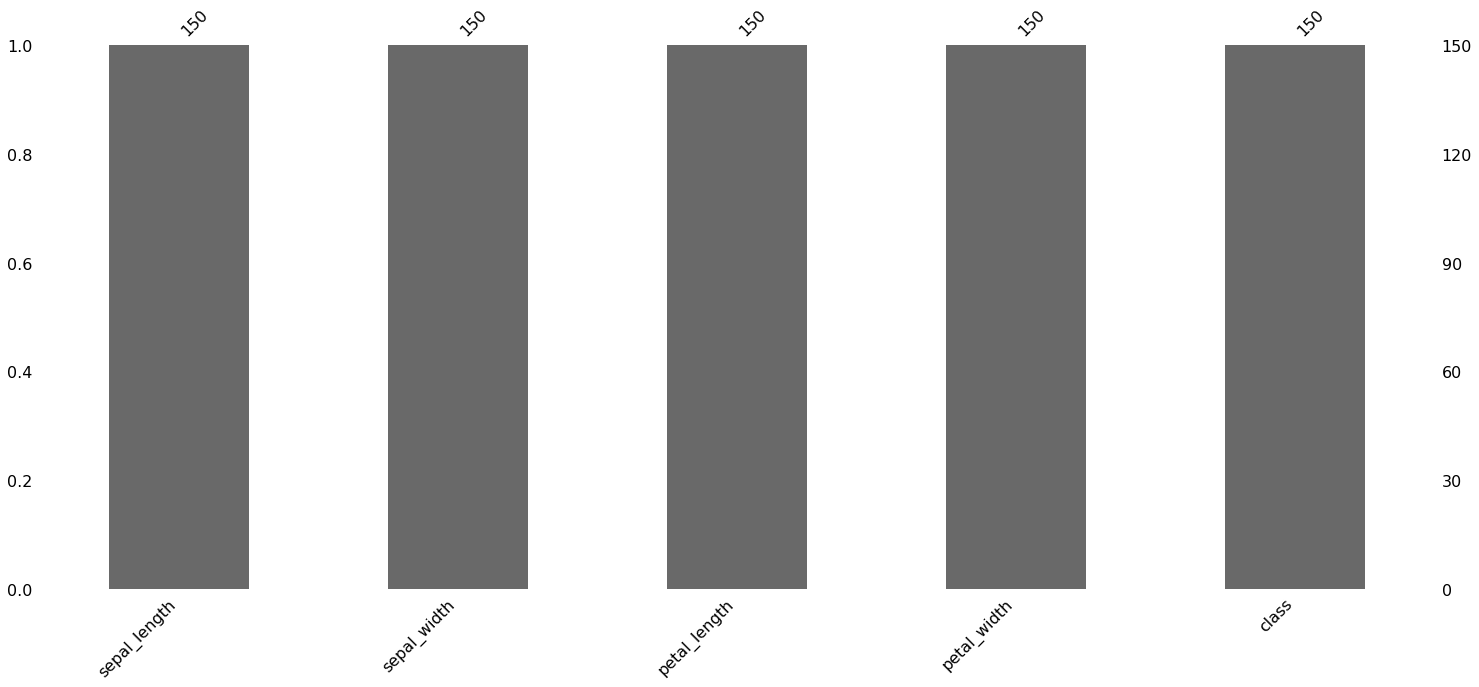

In [48]:
import missingno as msno
msno.bar(df)

<AxesSubplot:xlabel='class', ylabel='sepal_length'>

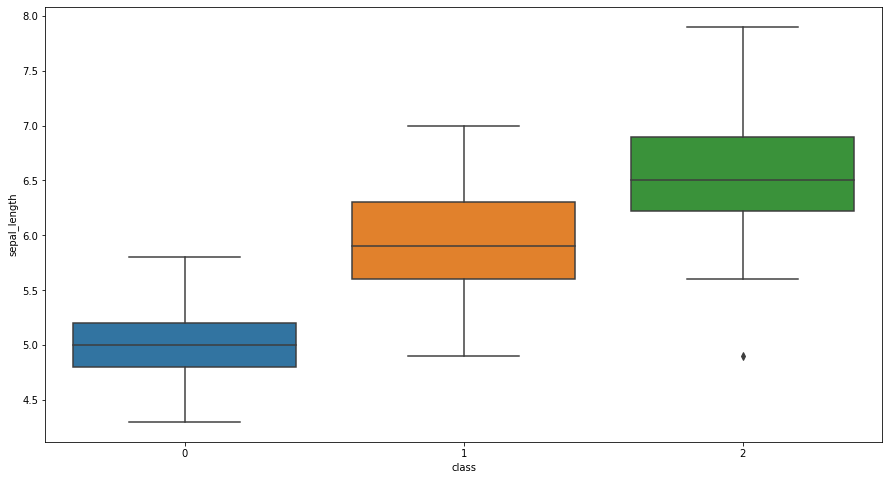

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(x='class',y='sepal_length',data=df.sort_values('sepal_length',ascending=False))

In [11]:
#Scatter Plot

colors=['red','orange','blue']
class1=['Iris-setosa' ,'Iris-virginica' ,'Iris-versicolor']

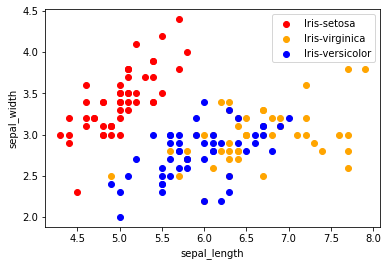

In [12]:
for i in range(3):
    x=df[df['class']==class1[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c=colors[i], label=class1[i])
    
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
    
    

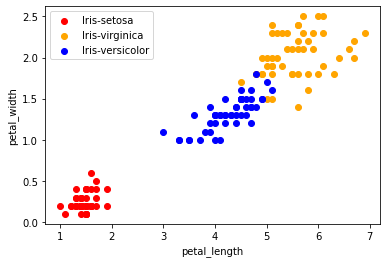

In [13]:
for i in range(3):
    x=df[df['class']==class1[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c=colors[i], label=class1[i])
    
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

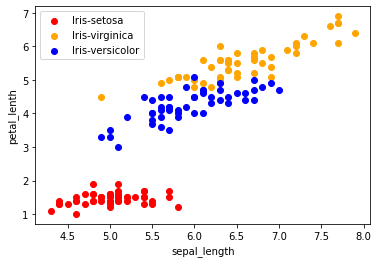

In [14]:
for i in range(3):
    x=df[df['class']==class1[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c=colors[i], label=class1[i])
    
plt.xlabel('sepal_length')
plt.ylabel('petal_lenth')
plt.legend()

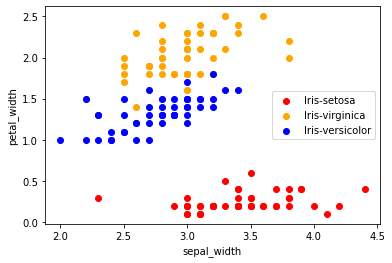

In [15]:
for i in range(3):
    x=df[df['class']==class1[i]]
    plt.scatter(x['sepal_width'],x['petal_width'], c=colors[i], label=class1[i])
    
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

# Coorelation Matrix

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

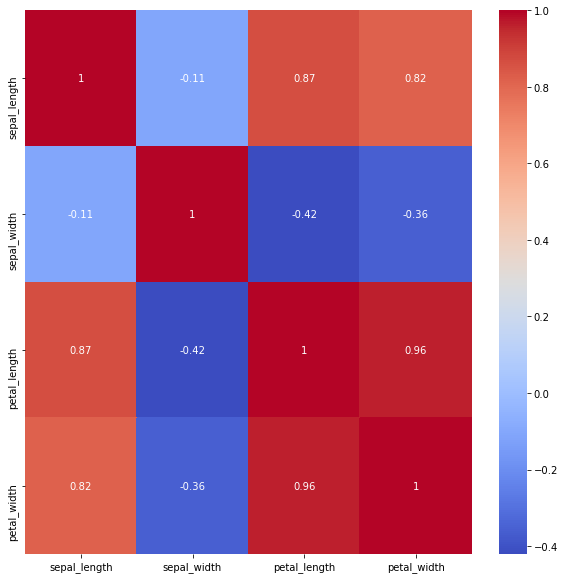

In [17]:
corr=df.corr()
fig,ax =plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")

Petal length and Petal width are highly correlated, one of them could be removed if the dataset was large

Now, for a better analysis let's keep all the columns and proceed further

# Label Encoder

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
df['class']=le.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Training the model

In [31]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['class'])
y=df['class']
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30)

In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [33]:
model.fit(x_train, y_train)

C:\Users\rashm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Accuracy

print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 97.77777777777777


# KNN

In [37]:


from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [38]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [39]:
print("Accuracy", model.score(x_test, y_test)*100)

Accuracy 95.55555555555556


# Decision tree

In [43]:

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [44]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
print("Accuracy", model.score(x_test, y_test)*100)

Accuracy 95.55555555555556


### Thank you